# Prediction on the final Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
import xgboost as xgb

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("DATA/final_df_bis.csv", index_col= 0)
df.drop(["Company"], axis = 1, inplace = True)
df

,Device,Market,SubMarket,Year,Value,Spendings,DevSpends,MarketSpends,SubMarketSpends,Cogs,Cogs_1,Cogs_2,Revenue,Revenue_1,Revenue_2,Ebitda,Ebitda_1,Ebitda_2
0,Amplifier/Comparator,Industrial,Power & Energy,2018,7.466000,200.530,172603.835,744408.882,59122.300,19059.000000,17278.0,17270.0,27662.00,25196.00,24929.0,3227.000000,2929.000000,2987.0
1,Amplifier/Comparator,Industrial,Power & Energy,2019,8.471900,189.490,163733.518,694336.713,56477.645,19018.000000,19059.0,17278.0,27978.00,27662.00,25196.0,3347.000000,3227.000000,2929.0
2,Amplifier/Comparator,Industrial,Power & Energy,2020,8.661150,195.081,163007.011,715358.270,58137.779,18123.000000,19018.0,19059.0,26134.00,27978.00,27662.0,2668.000000,3347.000000,3227.0
3,Amplifier/Comparator,Industrial,Power & Energy,2021,10.090255,240.245,212172.612,898036.093,67325.066,19407.000000,18123.0,19018.0,28945.00,26134.00,27978.0,4641.000000,2668.000000,3347.0
4,Amplifier/Comparator,Industrial,Power & Energy,2022,10.040442,257.635,242620.053,1010453.110,73245.445,19712.000000,19407.0,18123.0,29446.00,28945.00,26134.0,4477.000000,4641.000000,2668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21819,Voltage Regulator/Reference,Wireless Communications,Other Wireless,2020,0.809700,454.000,459595.802,798162.050,164973.950,2445.000000,2385.0,2237.0,4448.00,4485.00,4218.0,831.000000,899.000000,817.0
21820,Voltage Regulator/Reference,Wireless Communications,Other Wireless,2021,1.271038,584.000,592814.876,1019653.858,200105.606,2999.000000,2445.0,2385.0,5627.00,4448.00,4485.0,1198.000000,831.000000,899.0
21821,Voltage Regulator/Reference,Wireless Communications,Other Wireless,2022,1.229600,555.000,651481.707,1148735.868,194798.070,3157.000000,2999.0,2445.0,5781.00,5627.00,4448.0,1140.000000,1198.000000,831.0
21822,Voltage Regulator/Reference,Wireless Communications,Other Wireless,2023,1.182734,474.999,623323.575,898158.785,159867.898,16182.000000,3157.0,2999.0,4536.76,5781.00,5627.0,3668.885714,1140.000000,1198.0


### Linear Regression

In [39]:
first_df = df[(df.Year <= 2022)].iloc[:, 4:]
y_train = np.array(first_df.Value)
X_train = first_df.drop("Value", axis = 1)
X_bis = sm.add_constant(X_train)
est = sm.OLS(y_train, X_bis)
reg = est.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     62.98
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          3.14e-160
Time:                        11:03:18   Log-Likelihood:                -64957.
No. Observations:               10575   AIC:                         1.299e+05
Df Residuals:                   10561   BIC:                         1.300e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -18.6929      2.440     

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


### XGBoost

In [3]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [4]:
first_df = df[(df.Year <= 2022)]
y_train = np.array(first_df.Value)
X_train = first_df.drop("Value", axis = 1)
second_df = df[(df.Year >= 2023)]
y_test = np.array(second_df.Value)
X_test = second_df.drop("Value", axis = 1)

cat = ["Device", "Market", "SubMarket"]
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat)], remainder='passthrough')
encoder = full_pipeline.fit(X_train)

In [8]:
tscv = TimeSeriesSplit(n_splits=5, test_size=1000, gap = 3)

num_estimators=[50]
max_depth = [5]
alpha = [0.3, 0.6, 1, 1.5]
lam = [0.3, 0.6, 1, 1.5]
col_sample = [0.7, 0.9, 1]
lr = [0.05, 0.1, 0.2, 0.3]

init_lr = 0.3
def lr_decay(epoch):
    lr = init_lr*0.9**epoch   # *0.99 0.9 0.995 0.999
    return lr

lrs = xgboost.callback.LearningRateScheduler(lr_decay)

score = []
for num_esti in num_estimators:
    for md in max_depth:
        for a in alpha:
            for l in lam:
                for cs in col_sample:
                    for eta in lr:
                        res = [num_esti, md, a, l, cs, eta]
                        rmse = []
                        for train_index, test_index in tscv.split(X_train):
                            cv_train, cv_val = encoder.transform(X_train.iloc[train_index]), encoder.transform(X_train.iloc[test_index])
                            cv_y_train, cv_y_val = y_train[train_index], y_train[test_index]
                            init_lr = eta
                            #callbacks = xgb.callback.LearningRateScheduler(lr_decay)
                            model = XGBRegressor(n_estimators = num_esti, max_depth = md, reg_alpha = a, reg_lambda = l, colsample_bytree = cs, eta = eta)
                            model.fit(cv_train, cv_y_train) #, callbacks=[callbacks])
                            rmse.append(np.sqrt(mean_squared_error(model.predict(cv_val), cv_y_val)))
                        res.append(np.mean(rmse))
                        score.append(res)

num_estimators    50.000000
max_depth          5.000000
alpha              1.500000
lambda             1.000000
col_sample         1.000000
learning_rate      0.300000
rmse              60.097905
Name: 179, dtype: float64


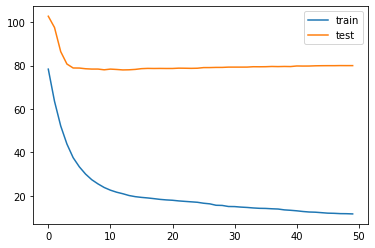

R2 score of the train set : 0.9857092561778664
R2 score of the train set : 0.5322966936153882


In [9]:
score = pd.DataFrame(score, columns = ["num_estimators", "max_depth", "alpha", "lambda", "col_sample", "learning_rate", "rmse"])
score.sort_values(by=['rmse'], ascending=False, inplace = True)
best_params = list(score.iloc[0, :])[:-1]
print(score.iloc[0, :])

evalset = [(encoder.transform(X_train), y_train), (encoder.transform(X_test),y_test)]
model = XGBRegressor(n_estimators = int(best_params[0]), max_depth = int(best_params[1]), reg_alpha = best_params[2], reg_lambda = best_params[3], colsample_bytree = best_params[4], eta = best_params[5])
init_lr = eta = best_params[5]
#callbacks = xgb.callback.LearningRateScheduler(lr_decay)
model.fit(encoder.transform(X_train), y_train, eval_set = evalset, verbose = 0)# , callbacks=[callbacks])
results = model.evals_result()
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_train)), y_train)}")
print(f"R2 score of the train set : {r2_score(model.predict(encoder.transform(X_test)), y_test)}")

# Changement Dataset for IAI

In [3]:
df = pd.read_csv("DATA/final_df_bis.csv", index_col= 0)
df.drop(["Company"], axis = 1, inplace = True)
cols = df.columns.to_list()
cols.pop(4)
cols += ["Value"]
df = df[cols]
df_train = df[(df.Year <= 2022)]
df_test = df[(df.Year > 2022)]
df_train.drop(["Year"], axis = 1, inplace = True)
df_test.drop(["Year"], axis = 1, inplace = True)
df_train.to_csv("IAI_train2.csv")
df_test.to_csv("IAI_test2.csv")

<ipython-input-3-605775313fcc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(["Year"], axis = 1, inplace = True)
<ipython-input-3-605775313fcc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(["Year"], axis = 1, inplace = True)
